In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd#
import numpy as np
import scipy as sp
import matplotlib
import os
import sklearn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

#SMOTE and IMBLearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#Plotly Libraries
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
from scipy import signal
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

In [193]:
df= pd.read_csv('final_one_for_class_weights_stnd_data.csv')

In [194]:
df.shape

(26126, 25)

In [195]:
df

,Power,Spindle,vibration,roll_mean_Power,roll_std_Power,roll_min_Power,roll_max_Power,roll_EME_Power,roll_IQR_Power,roll_skew_Power,roll_mean_Spindle,roll_std_Spindle,roll_min_Spindle,roll_max_Spindle,roll_EME_Spindle,roll_IQR_Spindle,roll_skew_Spindle,roll_mean_vibration,roll_std_vibration,roll_min_vibration,roll_max_vibration,roll_EME_vibration,roll_IQR_vibration,roll_skew_vibration,Label_Numeric
0,0.704504,-0.656656,-0.084409,-5.243308,3.549036,-8.273532,0.237851,-0.850778,-0.454735,1.763536,-0.894810,-0.794447,-0.436556,-0.891522,-0.561806,-0.672802,-0.718196,-0.338410,0.153263,-0.362442,-0.163626,-0.157717,-0.194306,1.940044,0
1,0.693592,-0.270631,-0.084409,-3.705873,4.412749,-8.273532,0.237851,-0.570332,13.084977,0.318055,-0.789580,-0.504153,-0.436556,-0.617958,-0.550103,-0.672802,1.657976,-0.275950,0.243939,-0.362442,-0.163626,-0.155242,0.617664,0.317541,0
2,0.705959,-0.259266,-0.084409,-2.165217,4.414593,-8.273532,0.238714,-0.288709,13.110000,-0.762990,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.213490,0.243939,-0.362442,-0.163626,-0.152767,0.617664,-0.895892,0
3,0.685590,-0.656656,-0.084409,-0.629865,3.544424,-8.273532,0.238714,-0.009022,-0.411362,-2.208437,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.151029,0.153263,-0.362442,-0.163626,-0.150292,-0.194306,-2.518395,0
4,0.692137,-0.643987,-0.084409,0.907191,-0.300801,1.455817,0.238714,0.271287,-0.426376,-0.175717,-0.677799,-0.437396,-0.436556,-0.609904,-0.537689,-0.252914,-0.072604,-0.088569,-0.250196,-0.012533,-0.163626,-0.147817,-0.194306,-0.289175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26121,0.433161,1.635646,0.064349,0.487805,-0.085733,0.482722,0.092613,0.123167,-0.424707,-2.186625,1.446901,1.115797,-0.436556,0.989496,1.002605,0.851926,-1.851743,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26122,0.438496,-0.640820,0.064349,0.577024,-0.298003,1.039291,0.092613,0.153365,-0.431936,0.896485,0.763519,1.291478,-0.436556,0.989496,0.502827,1.803361,-0.560021,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26123,0.451590,2.272624,0.064349,0.581002,-0.298183,1.039291,0.092613,0.154755,-0.424707,-0.097931,0.838480,1.431031,-0.436556,1.184371,0.623404,1.803361,-0.416993,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26124,0.436071,-0.075569,-0.010030,0.574877,-0.302332,1.039291,0.087868,0.152614,-0.431380,0.311312,0.996883,1.230144,-0.394501,1.184371,0.649921,1.188526,-0.394843,0.051966,-0.149331,0.074945,-0.040807,-0.134050,-0.194306,-2.518395,0


In [196]:
df['Label_Numeric'].value_counts()

Label_Numeric
0    16315
1     9811
Name: count, dtype: int64

In [197]:
X_test = df.iloc[:,0:-1]
Y_test = df.iloc[:,-1]

## Machine Learning

In [198]:
X_train_ml, X_test, y_train_ml, y_test = train_test_split(X_test, Y_test, test_size = 0.2, random_state = 0, stratify = Y_test)
V_train, end_test_ml, vl_train, test_label_ml = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

In [199]:
print("Shape of Train Features",X_train_ml.shape)
print("Shape of Train Labels",y_train_ml.shape)

print("Shape of validation Features",V_train.shape)
print("Shape of validation Labels",vl_train.shape)

print("Shape of Test Features",end_test_ml.shape)
print("Shape of Test Labels",test_label_ml.shape)

Shape of Train Features (20900, 24)
Shape of Train Labels (20900,)
Shape of validation Features (2613, 24)
Shape of validation Labels (2613,)
Shape of Test Features (2613, 24)
Shape of Test Labels (2613,)


In [67]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import scikitplot as skplt

In [158]:
# Define your classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='lbfgs', random_state=100),
    "Support Vector Classifier": SVC(kernel='linear', probability=True, random_state=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=100),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=4 , min_samples_split = 6, class_weight='balanced'),
    "XGBoost": XGBClassifier(learning_rate=0.1 , max_depth=5 ,base_score=0.3),
    "MLP": MLPClassifier(max_iter=200,
                    learning_rate='constant',
                    power_t=0.5, solver='lbfgs', alpha=0.0001, random_state=100)
}


Classifier: Logistic Regression
              precision    recall  f1-score   support

           0     0.8132    0.7978    0.8054      1632
           1     0.6739    0.6952    0.6844       981

    accuracy                         0.7593      2613
   macro avg     0.7436    0.7465    0.7449      2613
weighted avg     0.7609    0.7593    0.7600      2613

Accuracy: 0.7592805204745503
Confusion Matrix:
[[1601    0]
 [   0 1012]]


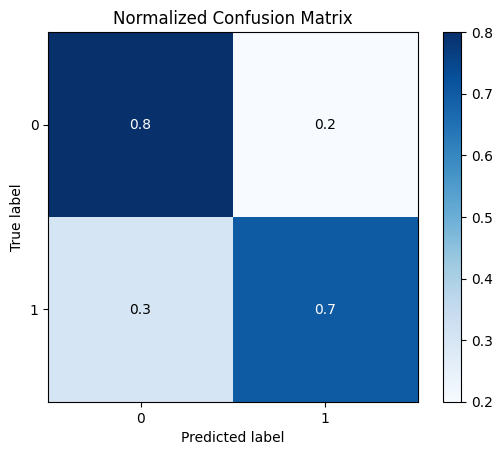

Saved Logistic Regression model as Logistic_Regression.pkl

Classifier: Support Vector Classifier
              precision    recall  f1-score   support

           0     0.8114    0.8015    0.8064      1632
           1     0.6763    0.6901    0.6831       981

    accuracy                         0.7597      2613
   macro avg     0.7439    0.7458    0.7448      2613
weighted avg     0.7607    0.7597    0.7601      2613

Accuracy: 0.7596632223497896
Confusion Matrix:
[[1612    0]
 [   0 1001]]


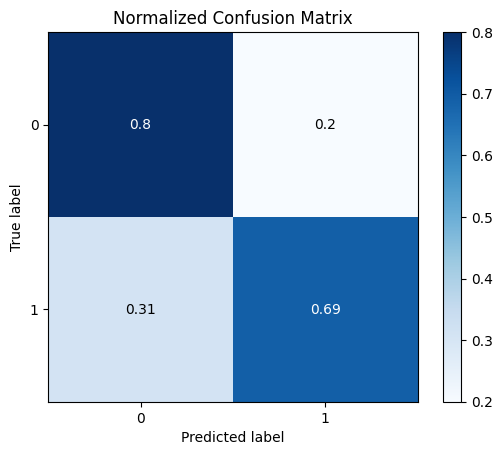

Saved Support Vector Classifier model as Support_Vector_Classifier.pkl

Classifier: K-Nearest Neighbors
              precision    recall  f1-score   support

           0     0.8711    0.8529    0.8619      1632
           1     0.7635    0.7900    0.7766       981

    accuracy                         0.8293      2613
   macro avg     0.8173    0.8215    0.8192      2613
weighted avg     0.8307    0.8293    0.8299      2613

Accuracy: 0.8293149636433218
Confusion Matrix:
[[1598    0]
 [   0 1015]]


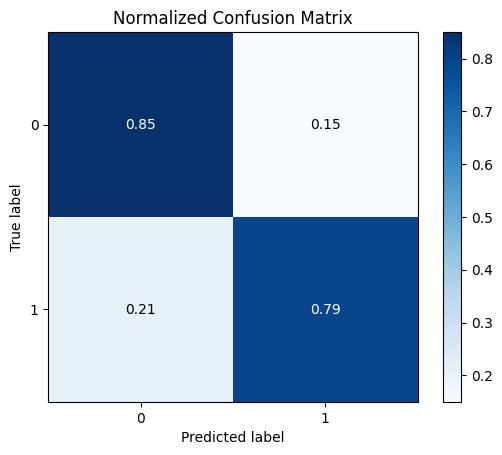

Saved K-Nearest Neighbors model as K-Nearest_Neighbors.pkl

Classifier: Decision Tree
              precision    recall  f1-score   support

           0     0.9049    0.9093    0.9071      1632
           1     0.8479    0.8410    0.8444       981

    accuracy                         0.8837      2613
   macro avg     0.8764    0.8751    0.8758      2613
weighted avg     0.8835    0.8837    0.8836      2613

Accuracy: 0.8836586299272866
Confusion Matrix:
[[1640    0]
 [   0  973]]


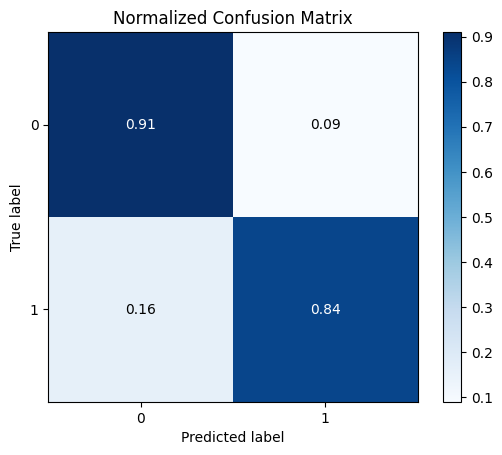

Saved Decision Tree model as Decision_Tree.pkl

Classifier: Naive Bayes
              precision    recall  f1-score   support

           0     0.9774    0.5043    0.6653      1632
           1     0.5432    0.9806    0.6991       981

    accuracy                         0.6831      2613
   macro avg     0.7603    0.7425    0.6822      2613
weighted avg     0.8144    0.6831    0.6780      2613

Accuracy: 0.6831228473019518
Confusion Matrix:
[[ 842    0]
 [   0 1771]]


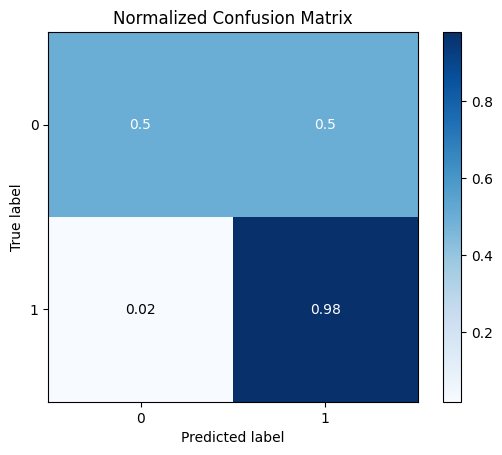

Saved Naive Bayes model as Naive_Bayes.pkl

Classifier: Random Forest
              precision    recall  f1-score   support

           0     0.9184    0.9167    0.9175      1632
           1     0.8618    0.8644    0.8631       981

    accuracy                         0.8971      2613
   macro avg     0.8901    0.8905    0.8903      2613
weighted avg     0.8971    0.8971    0.8971      2613

Accuracy: 0.8970531955606582
Confusion Matrix:
[[1629    0]
 [   0  984]]


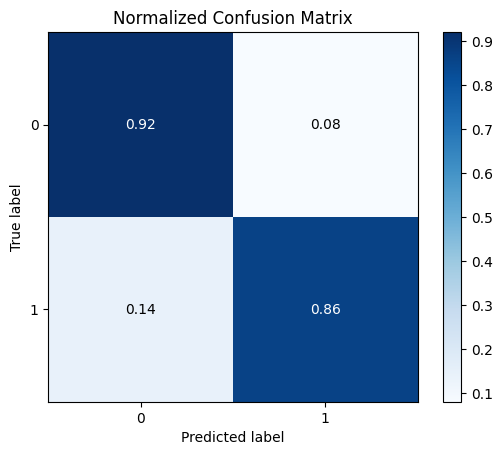

Saved Random Forest model as Random_Forest.pkl

Classifier: XGBoost
              precision    recall  f1-score   support

           0     0.9299    0.9026    0.9160      1632
           1     0.8455    0.8869    0.8657       981

    accuracy                         0.8967      2613
   macro avg     0.8877    0.8947    0.8909      2613
weighted avg     0.8982    0.8967    0.8971      2613

Accuracy: 0.8966704936854191
Confusion Matrix:
[[1584    0]
 [   0 1029]]


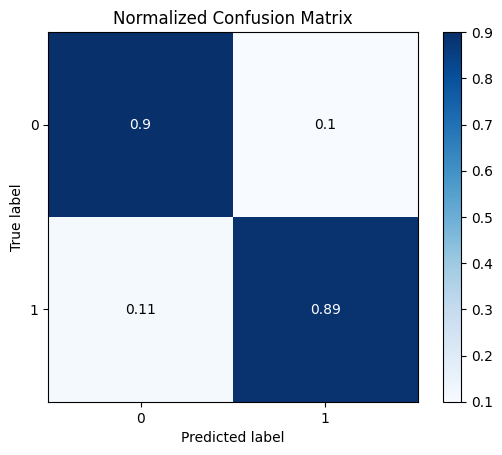

Saved XGBoost model as XGBoost.pkl

Classifier: MLP
              precision    recall  f1-score   support

           0     0.9015    0.8971    0.8993      1632
           1     0.8301    0.8369    0.8335       981

    accuracy                         0.8745      2613
   macro avg     0.8658    0.8670    0.8664      2613
weighted avg     0.8747    0.8745    0.8746      2613

Accuracy: 0.8744737849215461
Confusion Matrix:
[[1624    0]
 [   0  989]]


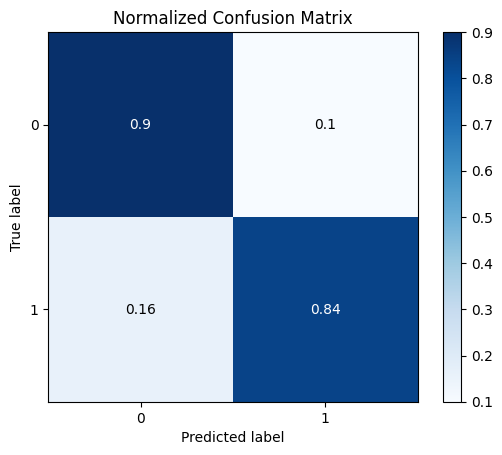

Saved MLP model as MLP.pkl


In [159]:
# Dictionary to store ROC curve data
roc_data = {}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    
    # Train the classifier
    clf.fit(X_train_ml, y_train_ml)
    
    # Predict on the test set
    predictions = clf.predict(end_test_ml)
    if hasattr(clf, "predict_proba"):
        probas = clf.predict_proba(end_test_ml)[:, 1]
    else:  # SVM with probability=False does not have predict_proba
        probas = clf.decision_function(end_test_ml)
    
    # Print classification report and accuracy score
    print(classification_report(test_label_ml, predictions, digits=4))
    print(f"Accuracy: {accuracy_score(test_label_ml, predictions)}")
    
    # Compute confusion matrix
    cf_matrix = confusion_matrix(predictions, predictions)
    print(f"Confusion Matrix:\n{cf_matrix}")
    skplt.metrics.plot_confusion_matrix(test_label_ml, predictions , normalize=True)
    plt.show()
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_label_ml, probas)
    roc_auc = auc(fpr, tpr)
    roc_data[clf_name] = (fpr, tpr, roc_auc)
    # Save the model as a .pkl file
    pkl_filename = f'{clf_name.replace(" ", "_")}.pkl'
    joblib.dump(clf, pkl_filename)
    print(f"Saved {clf_name} model as {pkl_filename}")

In [157]:
import joblib

# Save the model as a .pkl file
pkl_filename = f'{clf_name.replace(" ", "_")}.pkl'
joblib.dump(clf, pkl_filename)
print(f"Saved {clf_name} model as {pkl_filename}")

Saved MLP model as MLP.pkl


## Deep Learning 

In [200]:
df

,Power,Spindle,vibration,roll_mean_Power,roll_std_Power,roll_min_Power,roll_max_Power,roll_EME_Power,roll_IQR_Power,roll_skew_Power,roll_mean_Spindle,roll_std_Spindle,roll_min_Spindle,roll_max_Spindle,roll_EME_Spindle,roll_IQR_Spindle,roll_skew_Spindle,roll_mean_vibration,roll_std_vibration,roll_min_vibration,roll_max_vibration,roll_EME_vibration,roll_IQR_vibration,roll_skew_vibration,Label_Numeric
0,0.704504,-0.656656,-0.084409,-5.243308,3.549036,-8.273532,0.237851,-0.850778,-0.454735,1.763536,-0.894810,-0.794447,-0.436556,-0.891522,-0.561806,-0.672802,-0.718196,-0.338410,0.153263,-0.362442,-0.163626,-0.157717,-0.194306,1.940044,0
1,0.693592,-0.270631,-0.084409,-3.705873,4.412749,-8.273532,0.237851,-0.570332,13.084977,0.318055,-0.789580,-0.504153,-0.436556,-0.617958,-0.550103,-0.672802,1.657976,-0.275950,0.243939,-0.362442,-0.163626,-0.155242,0.617664,0.317541,0
2,0.705959,-0.259266,-0.084409,-2.165217,4.414593,-8.273532,0.238714,-0.288709,13.110000,-0.762990,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.213490,0.243939,-0.362442,-0.163626,-0.152767,0.617664,-0.895892,0
3,0.685590,-0.656656,-0.084409,-0.629865,3.544424,-8.273532,0.238714,-0.009022,-0.411362,-2.208437,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.151029,0.153263,-0.362442,-0.163626,-0.150292,-0.194306,-2.518395,0
4,0.692137,-0.643987,-0.084409,0.907191,-0.300801,1.455817,0.238714,0.271287,-0.426376,-0.175717,-0.677799,-0.437396,-0.436556,-0.609904,-0.537689,-0.252914,-0.072604,-0.088569,-0.250196,-0.012533,-0.163626,-0.147817,-0.194306,-0.289175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26121,0.433161,1.635646,0.064349,0.487805,-0.085733,0.482722,0.092613,0.123167,-0.424707,-2.186625,1.446901,1.115797,-0.436556,0.989496,1.002605,0.851926,-1.851743,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26122,0.438496,-0.640820,0.064349,0.577024,-0.298003,1.039291,0.092613,0.153365,-0.431936,0.896485,0.763519,1.291478,-0.436556,0.989496,0.502827,1.803361,-0.560021,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26123,0.451590,2.272624,0.064349,0.581002,-0.298183,1.039291,0.092613,0.154755,-0.424707,-0.097931,0.838480,1.431031,-0.436556,1.184371,0.623404,1.803361,-0.416993,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26124,0.436071,-0.075569,-0.010030,0.574877,-0.302332,1.039291,0.087868,0.152614,-0.431380,0.311312,0.996883,1.230144,-0.394501,1.184371,0.649921,1.188526,-0.394843,0.051966,-0.149331,0.074945,-0.040807,-0.134050,-0.194306,-2.518395,0


In [201]:
import scipy.stats as stats

frame_size = 30
hop_size = 10

In [202]:
def get_frames(df, frame_size, hop_size):
    

    N_FEATURES = 24

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        N_AccX = df['Power'].values[i: i + frame_size]
        N_AccY = df['Spindle'].values[i: i + frame_size]
        N_AccZ = df['vibration'].values[i: i + frame_size]
        N_GyroX = df['roll_mean_Power'].values[i: i + frame_size]
        N_GyroY = df['roll_std_Power'].values[i: i + frame_size]
        N_GyroZ = df['roll_min_Power'].values[i: i + frame_size]
        T_AccX = df['roll_max_Power'].values[i: i + frame_size]
        T_AccY = df['roll_EME_Power'].values[i: i + frame_size] 
        T_AccZ = df['roll_IQR_Power'].values[i: i + frame_size]
        
        roll_std_NAccX = df['roll_skew_Power'].values[i: i + frame_size]
        roll_IQR_TGyroX = df['roll_mean_Spindle'].values[i: i + frame_size]
        roll_EME_TGyrozz = df['roll_std_Spindle'].values[i: i + frame_size]
        roll_EME_TGyroZ = df['roll_min_Spindle'].values[i: i + frame_size]
        roll_EME_TGyroY = df['roll_max_Spindle'].values[i: i + frame_size]
        roll_skew_NGyroZ = df['roll_EME_Spindle'].values[i: i + frame_size]
        roll_max_NAccX = df['roll_IQR_Spindle'].values[i: i + frame_size]
        roll_mad_NGyroZ = df['roll_skew_Spindle'].values[i: i + frame_size]
        roll_mean_NGyroZ = df['roll_mean_vibration'].values[i: i + frame_size]
        roll_max_NGyroX = df['roll_std_vibration'].values[i: i + frame_size]
        roll_mean_NAccY = df['roll_min_vibration'].values[i: i + frame_size]
        roll_mean_NAccX = df['roll_max_vibration'].values[i: i + frame_size]
        roll_mad_NAccY = df['roll_EME_vibration'].values[i: i + frame_size]
        roll_EME_TAccX = df['roll_IQR_vibration'].values[i: i + frame_size]
        roll_kurt_NAccX = df['roll_skew_vibration'].values[i: i + frame_size]
        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['Label_Numeric'][i: i + frame_size])[0][0]
        frames.append([N_AccX,N_AccY,N_AccZ,N_GyroX,N_GyroY,N_GyroZ,T_AccX,T_AccY,T_AccZ,roll_std_NAccX,roll_IQR_TGyroX,roll_EME_TGyrozz,roll_EME_TGyroZ,roll_EME_TGyroY,roll_skew_NGyroZ, 
                       roll_max_NAccX,roll_mad_NGyroZ,roll_mean_NGyroZ,roll_max_NGyroX,roll_mean_NAccY,
                       roll_mean_NAccX,roll_mad_NAccY,roll_EME_TAccX,roll_kurt_NAccX])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [203]:
X,y = get_frames(df, frame_size, hop_size)

X.shape,y.shape

((2610, 30, 24), (2610,))

In [204]:
print(len(X))

2610


In [205]:
y.shape

(2610,)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
V_train, end_test, vl_train, test_label = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

In [207]:
print("Shape of Train Features",X_train.shape)
print("Shape of Train Labels",y_train.shape)

print("Shape of validation Features",V_train.shape)
print("Shape of validation Labels",vl_train.shape)

print("Shape of Test Features",end_test.shape)
print("Shape of Test Labels",test_label.shape)

Shape of Train Features (2088, 30, 24)
Shape of Train Labels (2088,)
Shape of validation Features (261, 30, 24)
Shape of validation Labels (261,)
Shape of Test Features (261, 30, 24)
Shape of Test Labels (261,)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import optimizers


In [19]:
def create_network():
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size=2, padding='same', strides=1, activation='relu', input_shape=X_train[0].shape))
    model.add(Conv1D(filters=4, kernel_size=2, padding='same', strides=1, activation='relu'))
    model.add(Conv1D(filters=4, kernel_size=2, padding='same', strides=1, activation='relu'))
    model.add(Conv1D(filters=8, kernel_size=2, padding='same', strides=1, activation='relu'))
    model.add(Conv1D(filters=8, kernel_size=2, padding='same', strides=1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    initial_learning_rate = 0.0001
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=100000,
        decay_rate=0.96,
        staircase=True
    )
    
    sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')

    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [34]:
def create_network_lstm():
    model = Sequential()
    model.add(LSTM(16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(8, return_sequences=True))
    model.add(LSTM(8, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(4, return_sequences=True))
    model.add(LSTM(4, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(8))
    model.add(Dense(4))
    model.add(Dense(1, activation='sigmoid'))

    initial_learning_rate = 0.0001
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=100000,
        decay_rate=0.96,
        staircase=True
    )

    sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
    
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [24]:
#  Hybrid Model of 1D CNN and LSTM
 # LFLB1
def creat_network_hybrid():
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size=2, padding='same' ,strides=1, activation='relu', input_shape = X_train[0].shape)) 
    model.add(Conv1D(filters=8, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Dropout(0.1))

    model.add(LSTM(16, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,TimeDistributed,MaxPooling1D, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay


In [22]:
model = create_network()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 30, 4)             196       
                                                                 
 conv1d_11 (Conv1D)          (None, 30, 4)             36        
                                                                 
 conv1d_12 (Conv1D)          (None, 30, 4)             36        
                                                                 
 conv1d_13 (Conv1D)          (None, 30, 8)             72        
                                                                 
 conv1d_14 (Conv1D)          (None, 30, 8)             136       
                                                                 
 dropout_4 (Dropout)         (None, 30, 8)             0         
                                                                 
 flatten_2 (Flatten)         (None, 240)              

In [ ]:
model1 = create_network_lsmt()
model1.summary()

In [34]:
model2 = creat_network_hybrid()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 30, 4)             196       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 30, 8)             72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 8)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 16)            1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 16)            2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

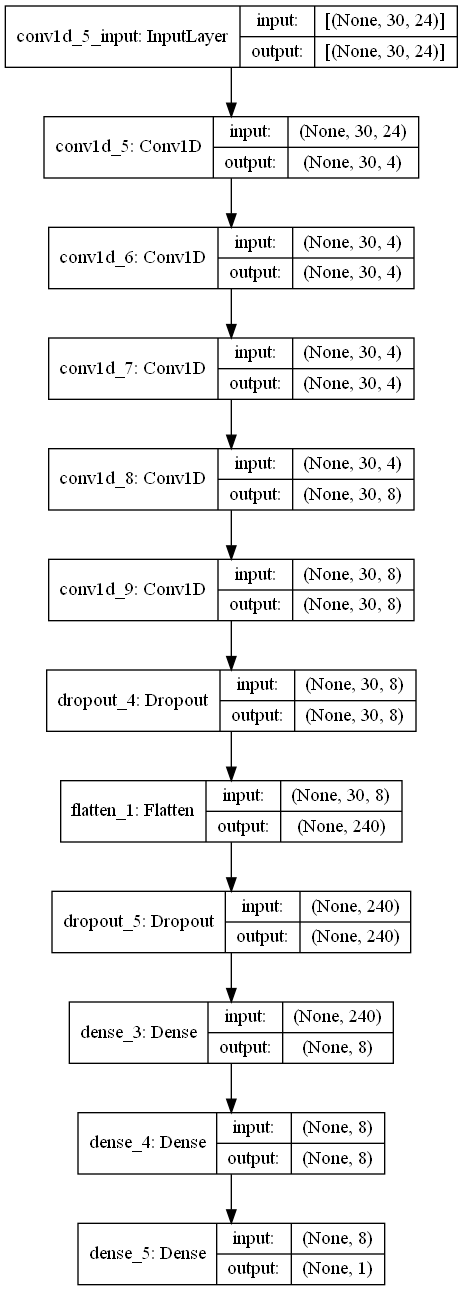

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model, "my_first_model.png", show_shapes=True)

In [18]:
class_weight = {0: 0.6686,
            1: 1.3314
               }

In [19]:
import livelossplot
#from livelossplot import PlotLossesKeras
from livelossplot import PlotLossesKerasTF
# from livelossplot.tf_keras import PlotLossesCallback
plot_losses = livelossplot.PlotLossesKerasTF()
plot_losses_hybrid = livelossplot.PlotLossesKerasTF()
plot_losses_lstm = livelossplot.PlotLossesKerasTF()
# plot_losses = livelossplot.PlotLossesKeras()
from tensorflow.keras.callbacks import EarlyStopping

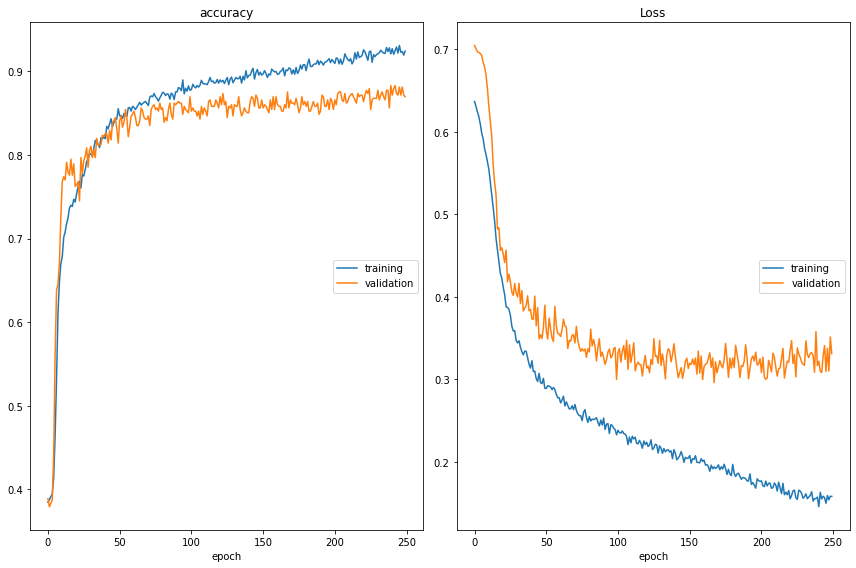

accuracy
	training         	 (min:    0.385, max:    0.931, cur:    0.924)
	validation       	 (min:    0.379, max:    0.883, cur:    0.870)
Loss
	training         	 (min:    0.146, max:    0.637, cur:    0.158)
	validation       	 (min:    0.296, max:    0.705, cur:    0.331)
Training time:  841.6880402565002


In [20]:
import time
start_time = time.time()

history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), shuffle=True, epochs=250,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time)

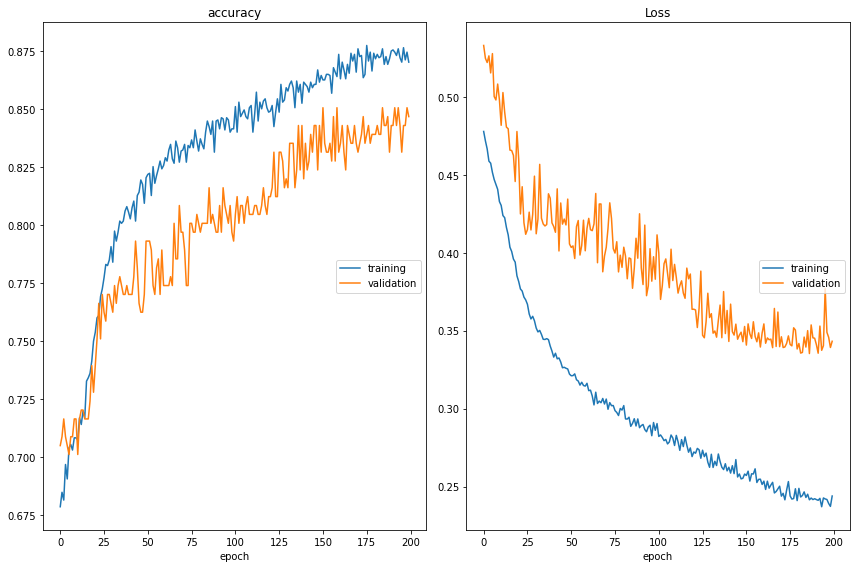

accuracy
	training         	 (min:    0.679, max:    0.877, cur:    0.870)
	validation       	 (min:    0.701, max:    0.851, cur:    0.847)
Loss
	training         	 (min:    0.237, max:    0.478, cur:    0.244)
	validation       	 (min:    0.335, max:    0.533, cur:    0.343)


In [37]:
history_hybrid = model2.fit(X_train, y_train,  validation_data=(V_train, vl_train), shuffle=True, epochs=200,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses_hybrid])

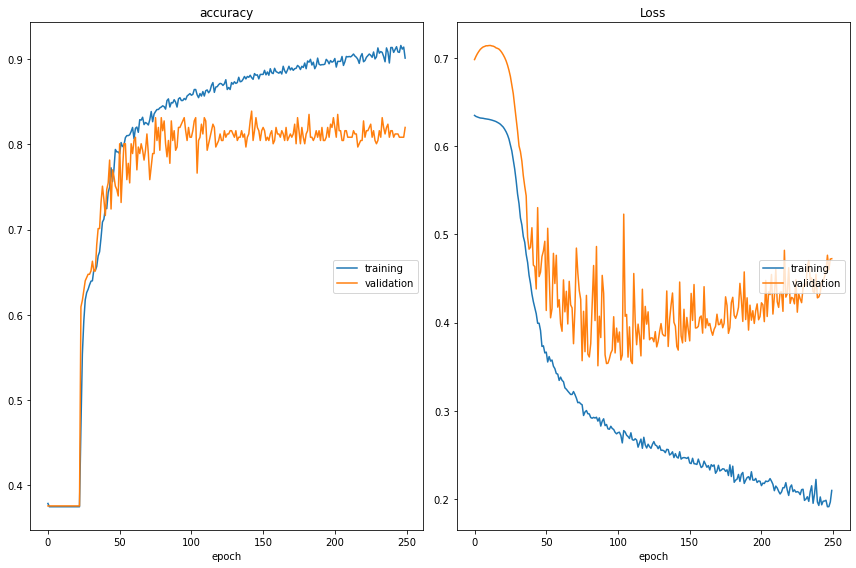

accuracy
	training         	 (min:    0.375, max:    0.916, cur:    0.901)
	validation       	 (min:    0.375, max:    0.839, cur:    0.820)
Loss
	training         	 (min:    0.191, max:    0.635, cur:    0.210)
	validation       	 (min:    0.351, max:    0.714, cur:    0.473)


In [45]:
history_lstm = model1.fit(X_train, y_train,  validation_data=(V_train, vl_train), shuffle=True, epochs=250,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses_lstm])

In [25]:
# model.save('CNN_model_hybrid.h5')

In [31]:
# model1.save('LSTM_model_hybrid.h5')

In [57]:
# model2.save('hybrid_model.h5')

In [81]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

In [320]:
from tensorflow import keras

model_cnn = keras.models.load_model('CNN_model_hybrid.h5')
model_lstm = keras.models.load_model('LSTM_model_hybrid.h5')
model_hybrid = keras.models.load_model('hybrid_model.h5')

# CNN _prediction:

In [121]:
# %%time
# cnn_rounded_predictions = model_cnn.predict_proba(end_test)
# cnn_rounded_predictions = (cnn_rounded_predictions > 0.5)

cnn_rounded_predictions = model_cnn.predict(end_test)
cnn_rounded_predictions = (cnn_rounded_predictions > 0.5)


9/9 [==============================] - 0s 2ms/step


In [122]:
print(classification_report(test_label, cnn_rounded_predictions,digits=4))
print(accuracy_score(test_label, cnn_rounded_predictions))
cf_matrix = confusion_matrix(test_label, cnn_rounded_predictions)
print(confusion_matrix(test_label, cnn_rounded_predictions))

              precision    recall  f1-score   support

           0     0.9551    0.9085    0.9313       164
           1     0.8571    0.9278    0.8911        97

    accuracy                         0.9157       261
   macro avg     0.9061    0.9182    0.9112       261
weighted avg     0.9187    0.9157    0.9163       261

0.9157088122605364
[[149  15]
 [  7  90]]


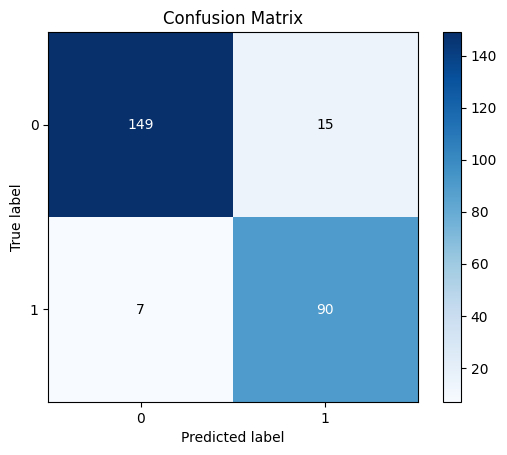

In [123]:
skplt.metrics.plot_confusion_matrix(test_label, cnn_rounded_predictions)
plt.show()

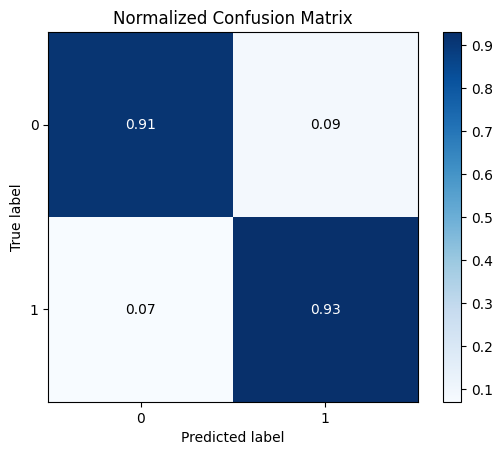

In [124]:
skplt.metrics.plot_confusion_matrix(test_label, cnn_rounded_predictions, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()

# LSTM prediction:

In [125]:
lstm_rounded_predictions = model_lstm.predict(end_test)
lstm_rounded_predictions = (lstm_rounded_predictions > 0.5)

9/9 [==============================] - 2s 8ms/step


In [126]:
print(classification_report(test_label, lstm_rounded_predictions,digits=4))
print(accuracy_score(test_label, lstm_rounded_predictions))
cf_matrix = confusion_matrix(test_label, lstm_rounded_predictions)
print(confusion_matrix(test_label, lstm_rounded_predictions))

              precision    recall  f1-score   support

           0     0.9321    0.9207    0.9264       164
           1     0.8687    0.8866    0.8776        97

    accuracy                         0.9080       261
   macro avg     0.9004    0.9037    0.9020       261
weighted avg     0.9085    0.9080    0.9082       261

0.9080459770114943
[[151  13]
 [ 11  86]]


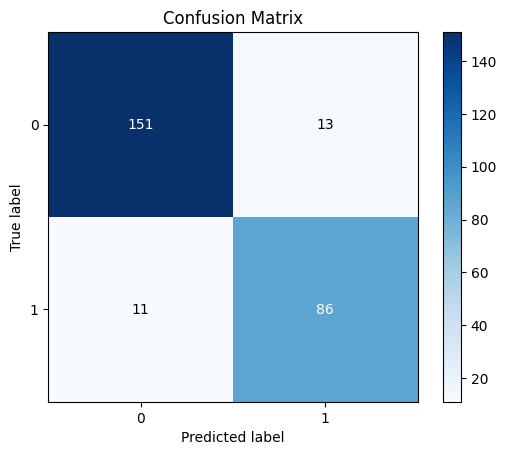

In [127]:
skplt.metrics.plot_confusion_matrix(test_label, lstm_rounded_predictions)
plt.show()

# Hybrid _prediction:

In [128]:
hybrid_rounded_predictions = model_hybrid.predict(end_test)
hybrid_rounded_predictions = (hybrid_rounded_predictions > 0.5)

9/9 [==============================] - 0s 4ms/step


In [129]:
# hybrid_rounded_predictions = hybrid_rounded_predictions*1

In [130]:
print(classification_report(test_label, hybrid_rounded_predictions, digits=4))
print(accuracy_score(test_label, hybrid_rounded_predictions))
cf_matrix = confusion_matrix(test_label, hybrid_rounded_predictions)
print(confusion_matrix(test_label, hybrid_rounded_predictions))

              precision    recall  f1-score   support

           0     0.9653    0.8476    0.9026       164
           1     0.7863    0.9485    0.8598        97

    accuracy                         0.8851       261
   macro avg     0.8758    0.8980    0.8812       261
weighted avg     0.8988    0.8851    0.8867       261

0.8850574712643678
[[139  25]
 [  5  92]]


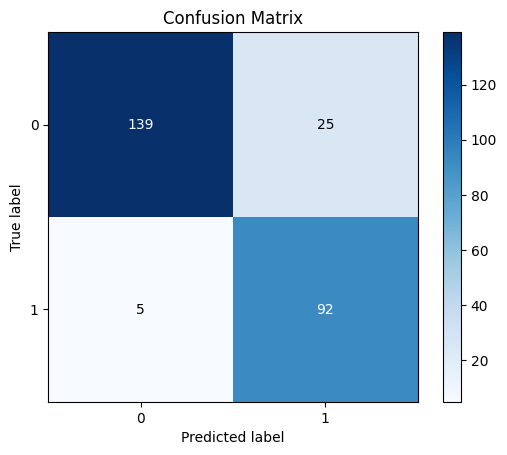

In [131]:
skplt.metrics.plot_confusion_matrix(test_label, hybrid_rounded_predictions)
plt.show()

# ROC curver Deep learning

In [321]:
from sklearn.metrics import roc_curve
y_pred_keras = model_cnn.predict(end_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, y_pred_keras)

9/9 [==============================] - 0s 2ms/step


In [322]:
#LS
y_pred_rf = model_lstm.predict(end_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_label, y_pred_rf)

9/9 [==============================] - 1s 7ms/step


In [323]:
# #LS
y_pred_hb = model_hybrid.predict(end_test).ravel()
fpr_hb, tpr_hb, thresholds_hb = roc_curve(test_label, y_pred_hb)


9/9 [==============================] - 0s 3ms/step


In [324]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_rf = auc(fpr_rf, tpr_rf)
auc_hb = auc(fpr_hb, tpr_hb)

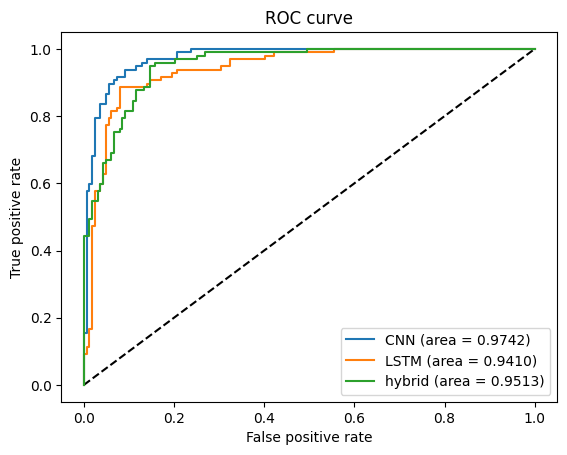

In [325]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.4f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='LSTM (area = {:.4f})'.format(auc_rf))
plt.plot(fpr_hb, tpr_hb, label='hybrid (area = {:.4f})'.format(auc_hb))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Deep Learning

In [326]:
# Compute ROC curve and AUC
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_label_ml, probas)
roc_auc = auc(fpr, tpr)
roc_data[clf_name] = (fpr, tpr, roc_auc)

In [327]:
from sklearn.metrics import roc_curve
y_pred_keras = model_cnn.predict(end_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, y_pred_keras)

9/9 [==============================] - 0s 1ms/step


In [328]:
#LS
y_pred_rf = model_lstm.predict(end_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_label, y_pred_rf)

9/9 [==============================] - 0s 7ms/step


In [329]:
# #LS
y_pred_hb = model_hybrid.predict(end_test).ravel()
fpr_hb, tpr_hb, thresholds_hb = roc_curve(test_label, y_pred_hb)

9/9 [==============================] - 0s 2ms/step


In [330]:
# Function to process and store ROC data for neural network models
def add_nn_model_to_roc_data(model, model_name, end_test, test_label, roc_data):
    probas = model.predict(end_test)[:, 0]  # Assuming binary classification and extracting probabilities for class 1
    rounded_predictions = (probas > 0.5).astype(int)
    print(f"\nClassifier: {model_name}")
    print(classification_report(test_label, rounded_predictions, digits=4))
    print(f"Accuracy: {accuracy_score(test_label, rounded_predictions)}")
    cf_matrix = confusion_matrix(test_label, rounded_predictions)
    print(f"Confusion Matrix:\n{cf_matrix}")
    skplt.metrics.plot_confusion_matrix(test_label, rounded_predictions ,normalize=True)
    plt.show()
    fpr, tpr, thresholds = roc_curve(test_label, probas)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

9/9 [==============================] - 0s 1ms/step

Classifier: CNN
              precision    recall  f1-score   support

           0     0.9551    0.9085    0.9313       164
           1     0.8571    0.9278    0.8911        97

    accuracy                         0.9157       261
   macro avg     0.9061    0.9182    0.9112       261
weighted avg     0.9187    0.9157    0.9163       261

Accuracy: 0.9157088122605364
Confusion Matrix:
[[149  15]
 [  7  90]]


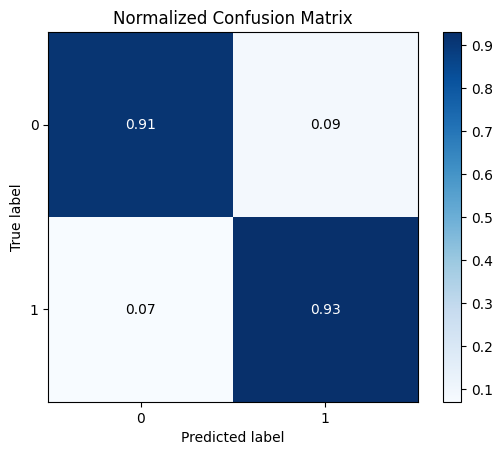

9/9 [==============================] - 0s 7ms/step

Classifier: LSTM
              precision    recall  f1-score   support

           0     0.9321    0.9207    0.9264       164
           1     0.8687    0.8866    0.8776        97

    accuracy                         0.9080       261
   macro avg     0.9004    0.9037    0.9020       261
weighted avg     0.9085    0.9080    0.9082       261

Accuracy: 0.9080459770114943
Confusion Matrix:
[[151  13]
 [ 11  86]]


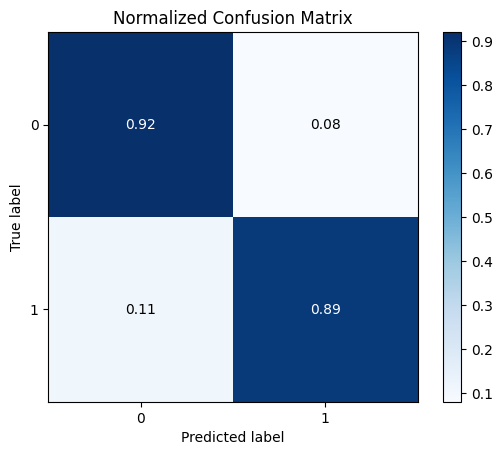

9/9 [==============================] - 0s 3ms/step

Classifier: Hybrid LSTM-CNN
              precision    recall  f1-score   support

           0     0.9653    0.8476    0.9026       164
           1     0.7863    0.9485    0.8598        97

    accuracy                         0.8851       261
   macro avg     0.8758    0.8980    0.8812       261
weighted avg     0.8988    0.8851    0.8867       261

Accuracy: 0.8850574712643678
Confusion Matrix:
[[139  25]
 [  5  92]]


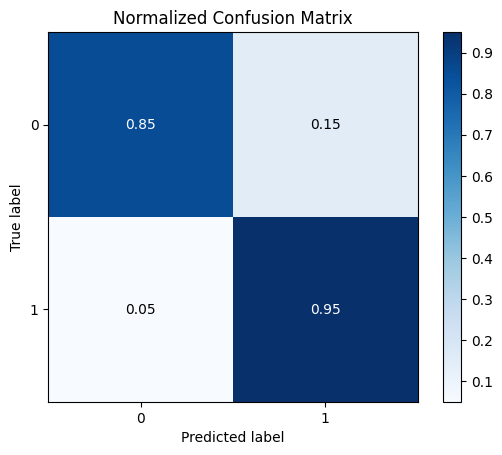

In [332]:
# Process and store ROC data for the CNN, LSTM, and hybrid models
add_nn_model_to_roc_data(model_cnn, "CNN", end_test, test_label, roc_data)
add_nn_model_to_roc_data(model_lstm, "LSTM", end_test, test_label, roc_data)
add_nn_model_to_roc_data(model_hybrid, "Hybrid LSTM-CNN", end_test, test_label, roc_data)


## ROC of Machine Learning and Deep Learning

<Figure size 640x480 with 0 Axes>

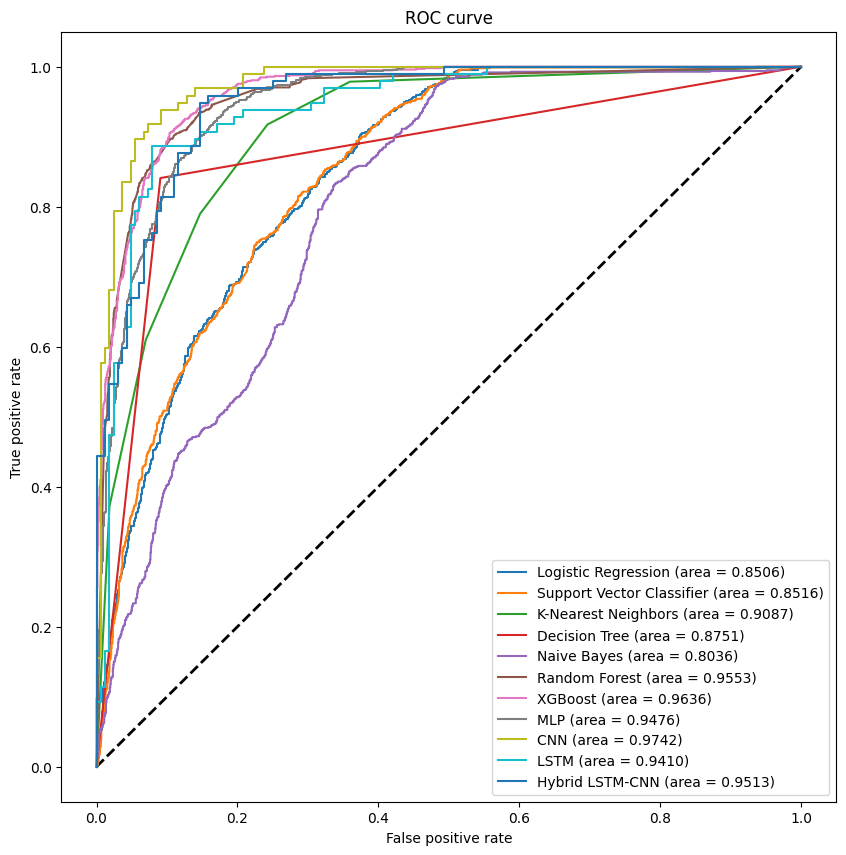

In [335]:
# Plot ROC curves
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--',lw=2)
for clf_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{clf_name} (area = {roc_auc:.4f})')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# Save the plot as an image file
plt.savefig('roc_curve.png')
plt.show()

<Figure size 640x480 with 0 Axes>

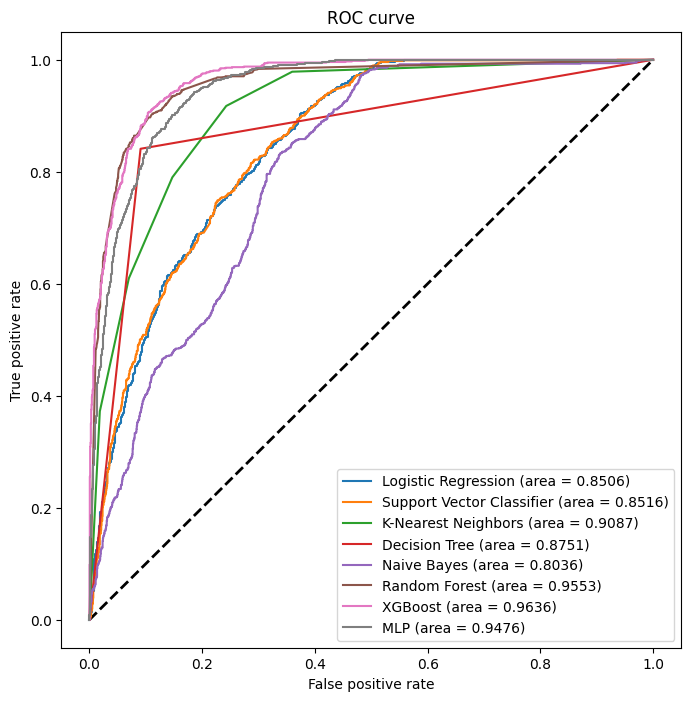

In [331]:
# Plot ROC curves
plt.figure(1)
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--',lw=2)
for clf_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{clf_name} (area = {roc_auc:.4f})')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## T-test 

In [296]:
# Load deep learning models
model_cnn = keras.models.load_model('CNN_model_hybrid.h5')
model_lstm = keras.models.load_model('LSTM_model_hybrid.h5')
model_hybrid = keras.models.load_model('hybrid_model.h5')

# Load machine learning models
model_NB = joblib.load('Naive_Bayes.pkl')
model_RF = joblib.load('Random_Forest.pkl')
model_LR = joblib.load('Logistic_Regression.pkl')
model_SVM = joblib.load('Support_Vector_Classifier.pkl')
model_KNN = joblib.load('K-Nearest_Neighbors.pkl')
model_DT = joblib.load('Decision_Tree.pkl')
model_XGB = joblib.load('XGBoost.pkl')
model_MLP = joblib.load('MLP.pkl')

In [297]:
# Make predictions on the test set for deep learning models
cnn_predictions = model_cnn.predict(end_test)
cnn_predictions = (cnn_predictions > 0.5).flatten()
lstm_predictions = model_lstm.predict(end_test)
lstm_predictions = (lstm_predictions > 0.5).flatten()
hybrid_predictions = model_hybrid.predict(end_test)
hybrid_predictions = (hybrid_predictions > 0.5).flatten()

# Make predictions on the test set for machine learning models
nb_predictions = model_NB.predict(end_test_ml)
nb_predictions = (nb_predictions > 0.5).flatten()
rf_predictions = model_RF.predict(end_test_ml)
rf_predictions = (rf_predictions > 0.5).flatten()
lr_predictions = model_LR.predict(end_test_ml)
lr_predictions = (lr_predictions > 0.5).flatten()
svm_predictions = model_SVM.predict(end_test_ml)
svm_predictions = (svm_predictions > 0.5).flatten()
knn_predictions = model_KNN.predict(end_test_ml)
knn_predictions = (knn_predictions > 0.5).flatten()
dt_predictions = model_DT.predict(end_test_ml)
dt_predictions = (dt_predictions > 0.5).flatten()
xgb_predictions = model_XGB.predict(end_test_ml)
xgb_predictions = (xgb_predictions > 0.5).flatten()
mlp_predictions = model_MLP.predict(end_test_ml)
mlp_predictions = (mlp_predictions > 0.5).flatten()

9/9 [==============================] - 0s 3ms/step


In [298]:


# Function to calculate bootstrapped accuracies
def bootstrap_accuracy(predictions, labels, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        indices = np.random.choice(range(len(labels)), size=len(labels), replace=True)
        sample_predictions = predictions[indices]
        sample_labels = labels[indices]
        accuracy = accuracy_score(sample_labels, sample_predictions)
        accuracies.append(accuracy)
    return accuracies

In [299]:
# Generate bootstrapped accuracies
cnn_bootstrap_accuracies = bootstrap_accuracy(cnn_predictions, test_label)
lstm_bootstrap_accuracies = bootstrap_accuracy(lstm_predictions, test_label)
hybrid_bootstrap_accuracies = bootstrap_accuracy(hybrid_predictions, test_label)
nb_bootstrap_accuracies = bootstrap_accuracy(nb_predictions, test_label)
rf_bootstrap_accuracies = bootstrap_accuracy(rf_predictions, test_label)
lr_bootstrap_accuracies = bootstrap_accuracy(lr_predictions, test_label)
svm_bootstrap_accuracies = bootstrap_accuracy(svm_predictions, test_label)
knn_bootstrap_accuracies = bootstrap_accuracy(knn_predictions, test_label)
dt_bootstrap_accuracies = bootstrap_accuracy(dt_predictions, test_label)
xgb_bootstrap_accuracies = bootstrap_accuracy(xgb_predictions, test_label)
mlp_bootstrap_accuracies = bootstrap_accuracy(mlp_predictions, test_label)

In [310]:
# # Perform paired t-tests

def perform_t_tests(cnn_accuracies, model_accuracies):
    results = []
    for model_name, accuracies in model_accuracies.items():
        if model_name != 'CNN':  # Exclude CNN vs CNN
            t_statistic, p_value = ttest_rel(cnn_accuracies, accuracies)
            results.append((model_name, t_statistic, p_value))
    return results

# Generate t-test results
t_test_results = perform_t_tests(cnn_bootstrap_accuracies, model_accuracies)

In [302]:

model_accuracies = {
    'CNN': cnn_bootstrap_accuracies,
    'LSTM': lstm_bootstrap_accuracies,
    'Hybrid': hybrid_bootstrap_accuracies,
    'Naive Bayes': nb_bootstrap_accuracies,
    'Random Forest': rf_bootstrap_accuracies,
    'Logistic Regression': lr_bootstrap_accuracies,
    'Support Vector Classifier': svm_bootstrap_accuracies,
    'K-Nearest Neighbors': knn_bootstrap_accuracies,
    'Decision Tree': dt_bootstrap_accuracies,
    'XGBoost': xgb_bootstrap_accuracies,
    'MLP': mlp_bootstrap_accuracies
}

In [311]:
# Print t-test results
print("\nPaired t-test Results:")
for result in t_test_results:
    model_name, t_statistic, p_value = result
    print(f'CNN vs {model_name} - t-statistic: {t_statistic:.4f}, p-value: {p_value:.4e}')
    print(f'The difference between CNN and {model_name} is statistically significant (p < 0.05).' if p_value < 0.05 else f'The difference between CNN and {model_name} is not statistically significant (p >= 0.05).')


Paired t-test Results:
CNN vs LSTM - t-statistic: 9.4632, p-value: 2.0721e-20
The difference between CNN and LSTM is statistically significant (p < 0.05).
CNN vs Hybrid - t-statistic: 36.8330, p-value: 2.7106e-188
The difference between CNN and Hybrid is statistically significant (p < 0.05).
CNN vs Naive Bayes - t-statistic: 377.6534, p-value: 0.0000e+00
The difference between CNN and Naive Bayes is statistically significant (p < 0.05).
CNN vs Random Forest - t-statistic: 353.1712, p-value: 0.0000e+00
The difference between CNN and Random Forest is statistically significant (p < 0.05).
CNN vs Logistic Regression - t-statistic: 345.0091, p-value: 0.0000e+00
The difference between CNN and Logistic Regression is statistically significant (p < 0.05).
CNN vs Support Vector Classifier - t-statistic: 323.3016, p-value: 0.0000e+00
The difference between CNN and Support Vector Classifier is statistically significant (p < 0.05).
CNN vs K-Nearest Neighbors - t-statistic: 331.7052, p-value: 0.000

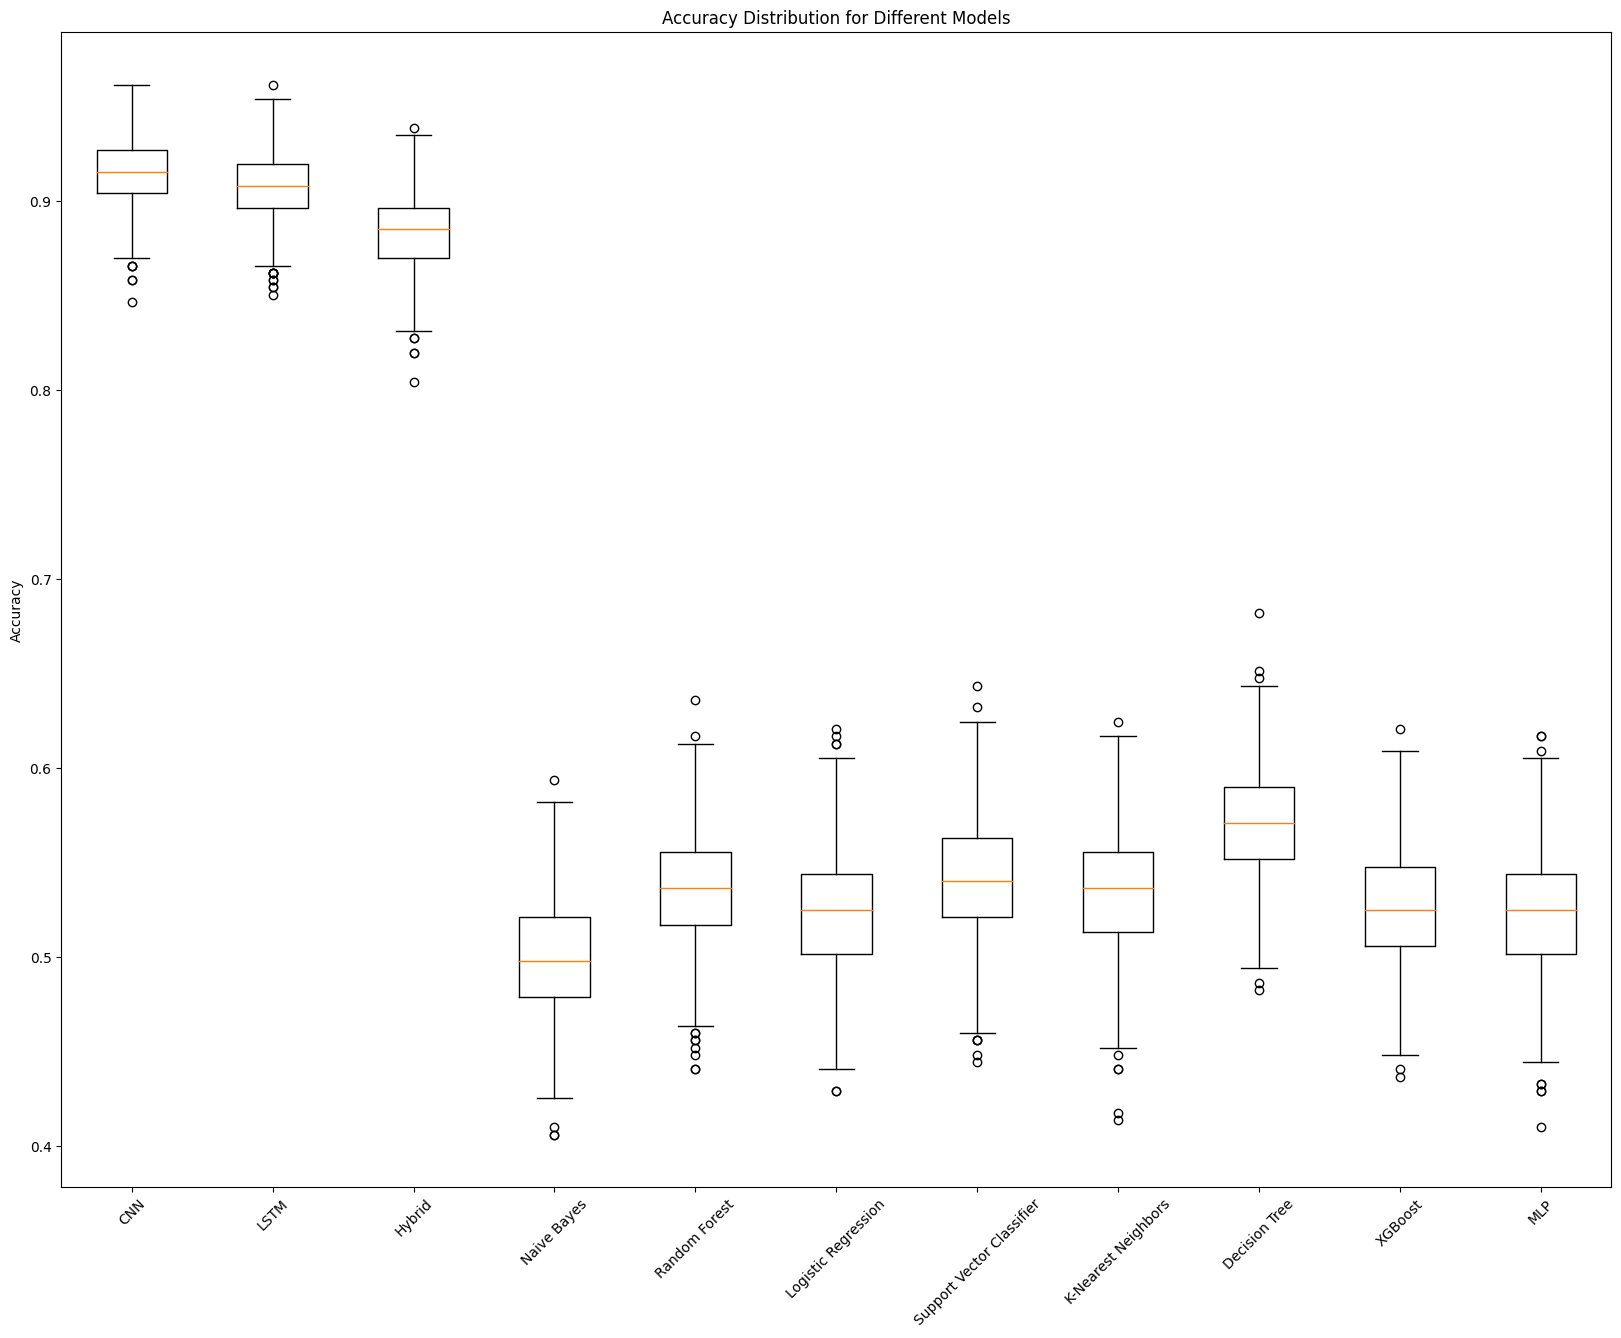

In [318]:
# Box plot of accuracies
data = [
    cnn_bootstrap_accuracies, lstm_bootstrap_accuracies, hybrid_bootstrap_accuracies,
    nb_bootstrap_accuracies, rf_bootstrap_accuracies, lr_bootstrap_accuracies,
    svm_bootstrap_accuracies, knn_bootstrap_accuracies, dt_bootstrap_accuracies,
    xgb_bootstrap_accuracies, mlp_bootstrap_accuracies
]
labels = [
    'CNN', 'LSTM', 'Hybrid', 'Naive Bayes', 'Random Forest', 'Logistic Regression',
    'Support Vector Classifier', 'K-Nearest Neighbors', 'Decision Tree', 'XGBoost', 'MLP'
]

plt.figure(figsize=(20,15))
plt.boxplot(data, labels=labels)
plt.title('Accuracy Distribution for Different Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()